In [3]:
import numpy as np

## Уровень 0

### a) Диагональная, ортогональная, но не единичная(!)

In [4]:
np.array([[np.cos(2), -np.sin(2)], [np.sin(2), np.cos(2)]])

array([[-0.41614684, -0.90929743],
       [ 0.90929743, -0.41614684]])

### b) Верхнетреугольная, ортогональная

У меня не получилось подобрать такую матрицу, т.к. получается, что над диагональю вылезают нули для выполнения равенства A @ A.T = E

### c) Нижнетреугольная, ортогональная

Аналогично здесь - вылезают нули под диагональю.

### d) Матрица, у которой определитель = 1, и все элементы не равны 0

In [7]:
A = np.array([[2, 3], [3, 5]])
np.linalg.det(A)

0.9999999999999991

In [8]:
m = np.array([[1, 2], [2, 3]])
l, v = np.linalg.eigh(m)

print(f'Собственные числа матрицы: {l[0]}, {l[1]},\nСобственные векторы матрицы: {v[0]}, {v[1]}')

Собственные числа матрицы: -0.2360679774997897, 4.23606797749979,
Собственные векторы матрицы: [-0.85065081  0.52573111], [0.52573111 0.85065081]


## Уровень 1

### Спектральное разложение матрицы m

In [9]:
S = np.diag(l)

In [10]:
A = v @ S @ v.T
A

array([[1., 2.],
       [2., 3.]])

### Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA

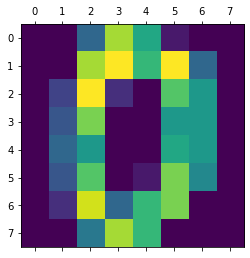

In [77]:
from sklearn.datasets import load_digits
digits = load_digits()
import matplotlib.pyplot as plt
plt.matshow(digits.images[0])
plt.show()

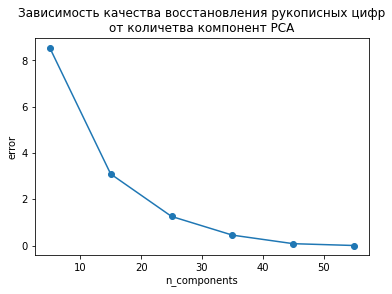

In [78]:
from sklearn.decomposition import PCA
X = digits.data
E = []
K = []
i = 5
while i < X.shape[1]:
    pca = PCA(n_components=i)
    X1 = pca.fit_transform(X)
    X2 = pca.inverse_transform(X1)
    error = mean_squared_error(X, X2)
    K.append(i)
    E.append(error)
    i += 10
plt.plot(K, E)
plt.scatter(K, E)
plt.xlabel('n_components')
plt.ylabel('error')
plt.title('Зависимость качества восстановления рукописных цифр\nот количетва компонент PCA');

Ошибка убывает с ростом количества компонент, значит, качество восстановления рукописных цифр лучше при большем количестве компонет PCA.